<a href="https://colab.research.google.com/github/maaz-ansari/Deep-Learning/blob/master/J002_Test1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

FASHION MNIST

In [0]:
import keras
from keras import models
from keras.layers import Dense, Dropout
from keras.utils import to_categorical
from keras.datasets import fashion_mnist
from keras.utils.vis_utils import model_to_dot
from IPython.display import SVG
from matplotlib import pyplot as plt
from keras.utils import plot_model

In [0]:
NUM_ROWS = 28
NUM_COLS = 28
NUM_CLASSES = 10
BATCH_SIZE = 128

In [0]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [0]:
X_train = X_train.reshape((X_train.shape[0], NUM_ROWS * NUM_COLS))
X_train = X_train.astype('float32') / 255
X_test = X_test.reshape((X_test.shape[0], NUM_ROWS * NUM_COLS))
X_test = X_test.astype('float32') / 255

In [0]:
y_train = to_categorical(y_train, NUM_CLASSES)
y_test = to_categorical(y_test, NUM_CLASSES)

In [0]:
model = models.Sequential()
model.add(Dense(512, activation='relu', input_shape=(NUM_ROWS * NUM_COLS,)))
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [0]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [0]:
history=model.fit(X_train, y_train,
          batch_size=64,
          epochs=10,
          verbose=1,
          validation_data=(X_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 2s 35us/step - loss: 0.5453 - acc: 0.8018 - val_loss: 0.4458 - val_acc: 0.8317
Epoch 2/10
60000/60000 [==============================] - 2s 27us/step - loss: 0.3793 - acc: 0.8605 - val_loss: 0.4002 - val_acc: 0.8557
Epoch 3/10
60000/60000 [==============================] - 2s 26us/step - loss: 0.3332 - acc: 0.8771 - val_loss: 0.4258 - val_acc: 0.8547
Epoch 4/10
60000/60000 [==============================] - 2s 27us/step - loss: 0.3103 - acc: 0.8862 - val_loss: 0.4101 - val_acc: 0.8565
Epoch 5/10
60000/60000 [==============================] - 2s 26us/step - loss: 0.2917 - acc: 0.8917 - val_loss: 0.3783 - val_acc: 0.8750
Epoch 6/10
60000/60000 [==============================] - 2s 27us/step - loss: 0.2759 - acc: 0.8974 - val_loss: 0.3409 - val_acc: 0.8803
Epoch 7/10
60000/60000 [==============================] - 2s 26us/step - loss: 0.2643 - acc: 0.9016 - val_loss: 0.4129 - val_acc

In [0]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.40075299893319605
Test accuracy: 0.8777


In [0]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_17 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_18 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_19 (Dense)             (None, 10)                2570      
Total params: 535,818
Trainable params: 535,818
Non-trainable params: 0
_________________________________________________________________


In [0]:
from keras import optimizers
sgd=keras.optimizers.SGD(lr=0.01, momentum=0.0, nesterov=False)

In [0]:
model.compile(optimizer=sgd,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [0]:
model.fit(X_train, y_train,
          batch_size=BATCH_SIZE,
          epochs=10,
          verbose=1,
          validation_data=(X_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 2s 34us/step - loss: 0.1834 - acc: 0.9304 - val_loss: 0.3340 - val_acc: 0.8945
Epoch 2/10
60000/60000 [==============================] - 1s 24us/step - loss: 0.1741 - acc: 0.9332 - val_loss: 0.3356 - val_acc: 0.8956
Epoch 3/10
60000/60000 [==============================] - 1s 24us/step - loss: 0.1703 - acc: 0.9348 - val_loss: 0.3321 - val_acc: 0.8982
Epoch 4/10
60000/60000 [==============================] - 2s 25us/step - loss: 0.1678 - acc: 0.9359 - val_loss: 0.3364 - val_acc: 0.8957
Epoch 5/10
60000/60000 [==============================] - 1s 24us/step - loss: 0.1660 - acc: 0.9362 - val_loss: 0.3342 - val_acc: 0.8963
Epoch 6/10
60000/60000 [==============================] - 1s 24us/step - loss: 0.1644 - acc: 0.9374 - val_loss: 0.3333 - val_acc: 0.8980
Epoch 7/10
60000/60000 [==============================] - 1s 25us/step - loss: 0.1628 - acc: 0.9375 - val_loss: 0.3337 - val_acc

In [0]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.3348528538048267
Test accuracy: 0.8998


In [0]:
from keras import optimizers
ada=keras.optimizers.Adagrad(lr=0.01)

In [0]:
model.compile(optimizer=ada,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [0]:
m= model.fit(X_train, y_train,
          batch_size=128,
          epochs=10,
          verbose=1,
          validation_data=(X_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 2s 35us/step - loss: 0.8444 - acc: 0.8822 - val_loss: 0.3362 - val_acc: 0.8911
Epoch 2/10
60000/60000 [==============================] - 2s 25us/step - loss: 0.1832 - acc: 0.9299 - val_loss: 0.3325 - val_acc: 0.8929
Epoch 3/10
60000/60000 [==============================] - 2s 26us/step - loss: 0.1693 - acc: 0.9351 - val_loss: 0.3414 - val_acc: 0.8944
Epoch 4/10
60000/60000 [==============================] - 2s 25us/step - loss: 0.1606 - acc: 0.9383 - val_loss: 0.3335 - val_acc: 0.8952
Epoch 5/10
60000/60000 [==============================] - 2s 26us/step - loss: 0.1537 - acc: 0.9419 - val_loss: 0.3471 - val_acc: 0.8984
Epoch 6/10
60000/60000 [==============================] - 2s 26us/step - loss: 0.1475 - acc: 0.9439 - val_loss: 0.3430 - val_acc: 0.8971
Epoch 7/10
60000/60000 [==============================] - 2s 26us/step - loss: 0.1424 - acc: 0.9453 - val_loss: 0.3375 - val_acc

In [0]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.3452378463432193
Test accuracy: 0.9025


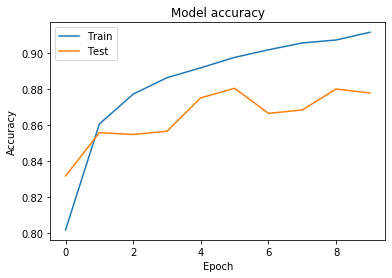

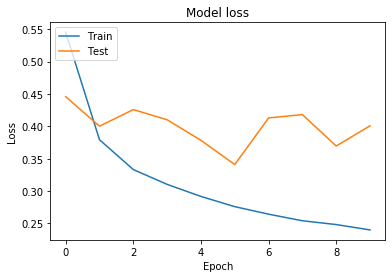

In [0]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [0]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_17 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_18 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_19 (Dense)             (None, 10)                2570      
Total params: 535,818
Trainable params: 535,818
Non-trainable params: 0
_________________________________________________________________


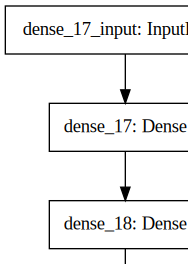

In [0]:
SVG(model_to_dot(model).create(prog='dot', format='svg'))

In [0]:
from keras import optimizers
adelta=keras.optimizers.Adadelta(lr=1.0, rho=0.95)

In [0]:
model.compile(optimizer=adelta,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [0]:
model.fit(X_train, y_train,
          batch_size=BATCH_SIZE,
          epochs=10,
          verbose=1,
          validation_data=(X_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 2s 41us/step - loss: 0.1775 - acc: 0.9323 - val_loss: 0.3695 - val_acc: 0.8903
Epoch 2/10
60000/60000 [==============================] - 2s 29us/step - loss: 0.1689 - acc: 0.9352 - val_loss: 0.3866 - val_acc: 0.8861
Epoch 3/10
60000/60000 [==============================] - 2s 30us/step - loss: 0.1620 - acc: 0.9376 - val_loss: 0.3892 - val_acc: 0.8935
Epoch 4/10
60000/60000 [==============================] - 2s 30us/step - loss: 0.1574 - acc: 0.9391 - val_loss: 0.3707 - val_acc: 0.8929
Epoch 5/10
60000/60000 [==============================] - 2s 29us/step - loss: 0.1524 - acc: 0.9408 - val_loss: 0.3767 - val_acc: 0.8960
Epoch 6/10
60000/60000 [==============================] - 2s 30us/step - loss: 0.1482 - acc: 0.9427 - val_loss: 0.3909 - val_acc: 0.8942
Epoch 7/10
60000/60000 [==============================] - 2s 30us/step - loss: 0.1439 - acc: 0.9448 - val_loss: 0.4230 - val_acc

In [0]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.466725763656199
Test accuracy: 0.8836


In [0]:
from keras import optimizers
adam=keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, amsgrad=False)

In [0]:
model.compile(optimizer=adam,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [0]:
model.fit(X_train, y_train,
          batch_size=BATCH_SIZE,
          epochs=10,
          verbose=1,
          validation_data=(X_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 3s 43us/step - loss: 0.1667 - acc: 0.9380 - val_loss: 0.4115 - val_acc: 0.8912
Epoch 2/10
60000/60000 [==============================] - 2s 29us/step - loss: 0.1528 - acc: 0.9411 - val_loss: 0.3962 - val_acc: 0.8908
Epoch 3/10
60000/60000 [==============================] - 2s 29us/step - loss: 0.1515 - acc: 0.9421 - val_loss: 0.4011 - val_acc: 0.8876
Epoch 4/10
60000/60000 [==============================] - 2s 29us/step - loss: 0.1445 - acc: 0.9452 - val_loss: 0.3978 - val_acc: 0.8955
Epoch 5/10
60000/60000 [==============================] - 2s 29us/step - loss: 0.1426 - acc: 0.9463 - val_loss: 0.4242 - val_acc: 0.8844
Epoch 6/10
60000/60000 [==============================] - 2s 29us/step - loss: 0.1391 - acc: 0.9469 - val_loss: 0.4420 - val_acc: 0.8814
Epoch 7/10
60000/60000 [==============================] - 2s 29us/step - loss: 0.1315 - acc: 0.9494 - val_loss: 0.3996 - val_acc

In [0]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.4864264339119196
Test accuracy: 0.8895


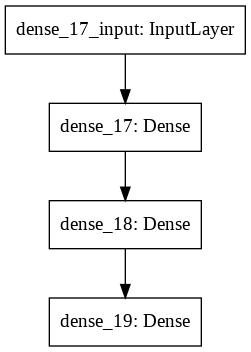

In [0]:
from keras.utils import plot_model
plot_model(model, to_file='model.png')